# Resize - Zooming

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt #imread, imsave, imshow

In [3]:
original_image = plt.imread("Temp/Gray/Image01.png")

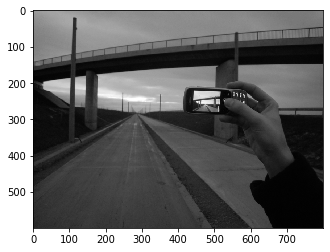

In [4]:
plt.imshow(original_image)

In [5]:
original_image.shape

(600, 800, 4)

## Nearest Neighbour Interpolation

In [10]:
def NNIZoom(original, k):
    X = original.copy()
    x, y, z = X.shape
    shape = (k*x, k*y, z) #k-times the image size
    resized = np.zeros(shape, dtype=X.dtype) #Initializing Empty Image Container
    
    resized[::k,::k,:] = original[:,:,:] #Copying original pixel values
    
    for i in range(1, k):
        resized[::k,i::k,:] = resized[::k,::k,:] #Copying Interpolating Values
        pass
    
    for i in range(1, k):
        resized[i::k,:,:] = resized[::k,:,:] #Copying Interpolating Values
        pass
    
    return resized

In [14]:
resized_image = NNIZoom(original_image, 3)

(600, 800, 4) -> (1800, 2400, 4)


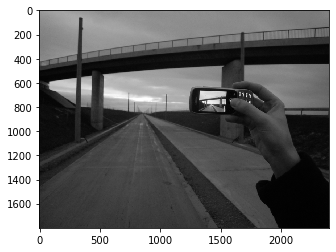

In [60]:
print(original_image.shape,"->",resized_image.shape)
plt.imshow(resized_image)

In [61]:
plt.imsave("tempNNI.png", resized_image)

### Disadvantage

Output very Blurry

# K-times

In [72]:
def KTZoom(original, k):
    X = original.copy()
    x, y, z = X.shape
    shape = ((k*(x-1))+1, (k*(y-1))+1, z) #k-times the image size
    resized = np.zeros(shape, dtype=X.dtype) #Initializing Empty Image Container
    
    resized[::k,::k,:] = original[:,:,:] #Copying original pixel values
    
    sh1 = (x, y-1, z)
    op = np.zeros(sh1, dtype=X.dtype)
    
    op[:,:,:] = ((resized[::k,:-k:k,:] + resized[::k,k::k,:])/k)
    
    resized[::k,1::k,:] = resized[::k,0:-k:k,:] + op[:,:,:]
    resized[::k,2::k,:] = resized[::k,1:-k+1:k,:] + op[:,:,:]
    
    return resized

In [73]:
resized_image2 = KTZoom(original_image, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(600, 800, 4) -> (1798, 2398, 4)


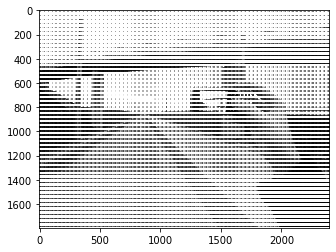

In [74]:
print(original_image.shape,"->",resized_image2.shape)
plt.imshow(resized_image2)

In [75]:
plt.imsave("tempKT.png", resized_image2)

ValueError: Floating point image RGB values must be in the 0..1 range.